# Compare to alternative models

In [1]:

from bayes_window.generative_models import generate_fake_spikes
from bayes_window.model_comparison import *
from bayes_window import BayesWindow

In [2]:
df, df_monster, index_cols, firing_rates = generate_fake_spikes(n_trials=140,
                                                                n_neurons=10,
                                                                n_mice=8,
                                                                dur=7, 
                                                               mouse_response_slope=20,
                                                               overall_stim_response_strength=4)

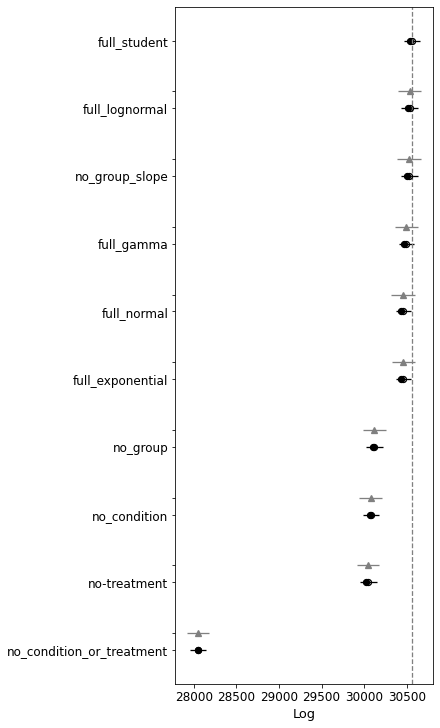

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
full_student,0,30559.5,12.9755,0,NaN,93.5555,0,False,log
full_lognormal,1,30533.8,12.8186,25.7419,NaN,98.2753,137.972,False,log
no_group_slope,2,30529.7,12.6979,29.8131,NaN,97.5995,139.266,False,log
full_gamma,3,30495,12.7784,64.5171,NaN,85.9038,139.565,False,log
full_normal,4,30460.5,12.8834,99.0132,NaN,91.2702,140.981,False,log
full_exponential,5,30460.4,13.0407,99.0953,NaN,88.7863,140.034,False,log
no_group,6,30119.4,7.16847,440.12,NaN,99.3656,135.704,False,log
no_condition,7,30077.7,3.5647,481.816,NaN,95.1239,135.766,False,log
no-treatment,8,30049,11.4481,510.493,NaN,101.165,129.853,False,log
no_condition_or_treatment,9,28051.5,2.50373,2508.03,0,96.7415,129.504,False,log


In [3]:
window = BayesWindow(df, y='isi', treatment='stim', group='mouse', condition='neuron')
window.fit_slopes(model=models.model_hierarchical, do_mean_over_trials=True,)
window.explore_models()

Simple one-way ANOVA:

In [4]:
window.fit_anova()

isi~stim
             sum_sq    df          F    PR(>F)
stim      0.001977   1.0  54.888196  0.000003
Residual  0.000504  14.0        NaN       NaN


True

## Linear mixed effects model:

In [3]:
window = BayesWindow(df, y='isi', treatment='stim', group='mouse', condition='neuron')
window.fit_lme()
window.posterior

Using formula isi ~ 1+ (neuron__0|mouse) + (neuron__1|mouse)  + (neuron__2|mouse)  + (neuron__3|mouse)  + (neuron__4|mouse)  + (neuron__5|mouse)  + (neuron__6|mouse)  + (neuron__7|mouse)  + (neuron__8|mouse)  + (neuron__9|mouse) 
                    Coef. Std.Err.        z  P>|z|  [0.025  0.975]
Intercept           0.044    0.003   14.168  0.000   0.038   0.050
neuron__0 | mouse   0.019    0.001   38.478  0.000   0.018   0.020
neuron__1 | mouse   0.014    0.001   28.593  0.000   0.013   0.015
neuron__2 | mouse   0.010    0.001   19.589  0.000   0.009   0.011
neuron__3 | mouse   0.005    0.001   10.237  0.000   0.004   0.006
neuron__4 | mouse   0.001    0.001    1.349  0.177  -0.000   0.002
neuron__5 | mouse  -0.003    0.001   -6.823  0.000  -0.004  -0.002
neuron__6 | mouse  -0.007    0.001  -13.852  0.000  -0.008  -0.006
neuron__7 | mouse  -0.010    0.001  -20.814  0.000  -0.011  -0.009
neuron__8 | mouse  -0.014    0.001  -26.990  0.000  -0.015  -0.013
neuron__9 | mouse  -0.017    0.00

,neuron,center interval,Std.Err.,z,p,higher interval,lower interval
0,0,0.019,0.001,38.478,0.000,0.018,0.020
1,1,0.014,0.001,28.593,0.000,0.013,0.015
2,2,0.010,0.001,19.589,0.000,0.009,0.011
3,3,0.005,0.001,10.237,0.000,0.004,0.006
4,4,0.001,0.001,1.349,0.177,-0.000,0.002
5,5,-0.003,0.001,-6.823,0.000,-0.004,-0.002
6,6,-0.007,0.001,-13.852,0.000,-0.008,-0.006
7,7,-0.010,0.001,-20.814,0.000,-0.011,-0.009
8,8,-0.014,0.001,-26.990,0.000,-0.015,-0.013
9,9,-0.017,0.001,-32.856,0.000,-0.018,-0.016


In [9]:
window.plot(x='neuron')

alt.LayerChart(...)

Of course in reality, neurons don't have this consistent variation in each mouse. This would only be applicable to a priori classes of neurons